# Linear Regression in NumPy 

### Theory


## Overview
Linear regression is a statistical technique used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes a linear relationship and remains a foundational technique in machine learning.

## Assumptions of Linear Regression

**Linearity**:  
The relationship between the independent variables (predictors) and the dependent variable (outcome) is assumed to be linear. Specifically, the expected value of the dependent variable is a linear function of the independent variables.

**Independence of Errors**:  
The residuals (the differences between the observed and predicted values) should be independent of each other. This assumption means there should be no autocorrelation (particularly important in time series data).

**Homoscedasticity (Constant Variance of Errors)**:  
The residuals should have constant variance at all levels of the independent variables. This means that the spread of the residuals should be similar across the range of predicted values. If there is heteroscedasticity, it suggests that the model is performing better for some values than others.

**Normality of Errors**:  
The residuals should be normally distributed. This assumption is especially important when conducting hypothesis testing (e.g., calculating p-values or confidence intervals).

**No Multicollinearity**:  
The independent variables should not be highly correlated with each other. If multicollinearity exists, it becomes difficult to determine the individual effect of each predictor.

**No Endogeneity (No Correlation Between Errors and Predictors)**:  
The independent variables should not be correlated with the error term. This assumption ensures that the predictors are truly independent of the error term and are not capturing any omitted variable bias.



## The General Equation of Linear Regression

At the heart of linear regression is the equation that represents the relationship between the target variable and one or more predictors:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p + \epsilon
$$

where:  
**y**: Dependent (or target) variable we aim to predict.  
**x1, x2, ..., xp**: Independent (or explanatory) variables.  
**β0**: Intercept term.  
**β1, β2, ..., βp**: Coefficients (or weights) that quantify the impact of each predictor \( x_i \) on \( y \).  
**ϵ**: Error term representing the irreducible noise or unmodeled aspects of the data.

The goal of linear regression is to estimate the coefficients (β) that minimize the prediction error for the dependent variable based on the given set of independent variables.


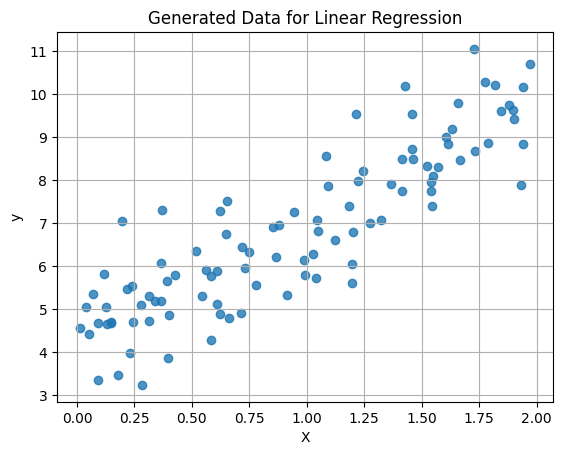

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 data points
X = 2 * np.random.rand(100, 1)           # Shape: (100,1)
y = 4 + 3 * X + np.random.randn(100, 1)  # True relationship with Gaussian noise

# Visualize the data
plt.scatter(X, y, alpha=0.8)
plt.title("Generated Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Model Fitting: Estimating the Coefficients

The primary task in linear regression is to find the set of coefficients (β₀, β₁, ..., βₚ) that minimize the difference between predicted and actual values. This is achieved by minimizing the sum of squared errors (SSE) or residuals, which is the difference between the observed data points and the predicted values from the regression line.

The fitted model can then be used to make predictions using the following equation:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + \hat{\beta}_2x_2 + \cdots + \hat{\beta}_px_p
$$

where **ŷ** represents the predicted values and **β̂ᵢ** are the estimated coefficients.


## Normal Equation

For smaller datasets or problems where computational complexity is not a concern, the normal equation offers a closed-form solution to finding the best coefficients. The normal equation is derived by minimizing the residual sum of squares (RSS) and is given by:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

where **X** is the matrix of input features, and **y** is the vector of target values.


In [3]:
# Step 4: Fit the Model using the Normal Equation

# Add bias (intercept) term: x₀ = 1
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape (100, 2)

# Compute beta_hat using the Normal Equation: (XᵀX)⁻¹Xᵀy
theta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Estimated Coefficients (β₀, β₁):", theta_hat.ravel())


Estimated Coefficients (β₀, β₁): [4.21509616 2.77011339]


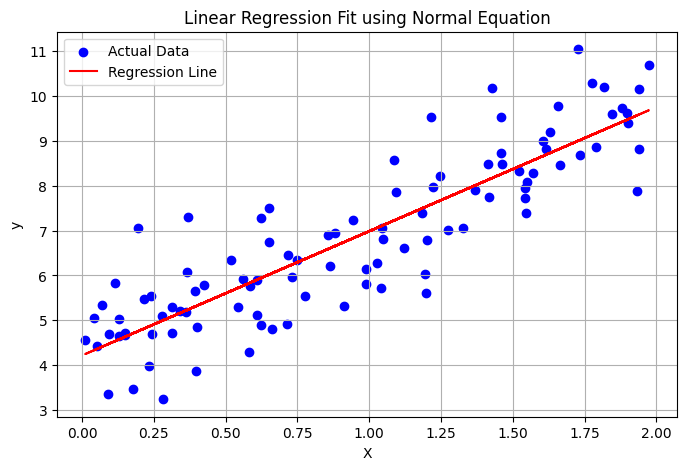

In [4]:
# Step 5: Make predictions using the estimated coefficients
y_pred = X_b @ theta_hat  # shape: (100, 1)

# Plot the original data and the fitted regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression Fit using Normal Equation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## Evaluation of Linear Regression Models

Evaluating a linear regression model involves assessing how well the model fits the data and how accurate its predictions are.

### Mean Squared Error (MSE)
MSE is a common loss function for regression models. It is calculated by taking the average of the squared differences between the actual and predicted values:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Interpretation**: A lower MSE indicates that the model is making predictions closer to the actual values.

### R-Squared (Coefficient of Determination)
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model perfectly explains the variance in the data.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

**Interpretation**: An \( R^2 \) of 0.8, for example, means that 80% of the variance in the target variable is explained by the model.


In [5]:
# Step 6: Evaluate the model

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - ss_res / ss_total

# Compute metrics
mse = mean_squared_error(y, y_pred)
r2 = r_squared(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.8065845639670531
R-squared (R²): 0.7692735413614223


## Optimization Techniques: Finding the Best Coefficients

### Gradient Descent
Gradient descent is an iterative optimization algorithm used to minimize the cost function (MSE). It works by calculating the gradient (or slope) of the error function and updating the coefficients in the direction that minimizes this error. It is particularly useful when working with large datasets or many features, as it is computationally efficient.

The update rule in gradient descent for linear regression is:

$$
\beta_j = \beta_j - \alpha \frac{\partial}{\partial \beta_j} MSE
$$

where:  
**α** is the learning rate (a small positive number that controls the step size).  
**∂/∂βⱼ MSE** represents the derivative of the cost function with respect to the coefficient **βⱼ**.


In [6]:

# Prepare the same data with bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape (100, 2)

# Initialize random weights
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = X_b.shape[0]

# Gradient Descent Loop
for iteration in range(n_iterations):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - learning_rate * gradients

print("Estimated Coefficients using Gradient Descent:", theta.ravel())

# Predict using learned theta
y_pred_gd = X_b @ theta

# Evaluate
print("MSE (Gradient Descent):", mean_squared_error(y, y_pred_gd))
print("R² (Gradient Descent):", r_squared(y, y_pred_gd))


Estimated Coefficients using Gradient Descent: [4.21509616 2.77011339]
MSE (Gradient Descent): 0.806584563967053
R² (Gradient Descent): 0.7692735413614225


## What is Multicollinearity?

Multicollinearity arises when two or more independent variables in a linear regression model are highly correlated, resulting in overlapping or redundant information. In such cases, the model struggles to isolate the individual effects of each predictor on the dependent variable, leading to unreliable coefficient estimates, inflated standard errors, and challenges in interpretation.

This presents a significant limitation in linear regression, as it compromises the model’s capacity to accurately estimate the effects of the predictors.

Multicollinearity can be identified using diagnostic tools such as the Variance Inflation Factor (VIF) and addressed through strategies like eliminating correlated variables, applying regularization techniques, or employing dimensionality reduction methods, such as Principal Component Analysis (PCA).


## Is Multicollinearity a Limitation of Linear Regression?

Yes, multicollinearity is considered a limitation of linear regression. However, it is not an inherent limitation of the model itself but rather a problem in the data that can affect the performance and interpretability of the linear regression model.

Here’s how it limits linear regression:

**Unreliable Coefficients**: High multicollinearity can make the regression coefficients unreliable. This undermines the predictive power of the model and leads to difficulties in drawing meaningful conclusions.

**Difficulty in Interpretation**: When variables are highly correlated, it becomes hard to tell which one is driving the effect on the dependent variable. This makes it difficult to understand the relationship between predictors and the outcome.

**Inflated Variance of Predictions**: Multicollinearity increases the variability of the coefficient estimates, which in turn can increase the variability in predictions, making the model less generalizable.


## How to Detect and Address Multicollinearity?

**Variance Inflation Factor (VIF)**:  
A common diagnostic tool is the VIF, which measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF greater than 5 or 10 indicates high multicollinearity.

**Correlation Matrix**:  
Examining a correlation matrix of the independent variables can reveal pairs of variables that are highly correlated (correlation close to 1 or -1). This is an indication of potential multicollinearity.

**Drop One of the Correlated Variables**:  
If two or more variables are highly correlated, consider dropping one of them. This can simplify the model and reduce multicollinearity.

**Principal Component Analysis (PCA)**:  
PCA can transform the correlated variables into a set of uncorrelated components, which can be used in regression analysis. This reduces the dimensionality of the data and avoids multicollinearity.

**Ridge Regression or Lasso Regression**:  
These are regularization techniques that can help mitigate the effects of multicollinearity. Ridge regression adds a penalty to the size of the coefficients, which reduces their sensitivity to multicollinearity. Lasso regression goes a step further and can shrink some coefficients to zero, effectively selecting a subset of the predictors.


## How to Detect and Address Multicollinearity?

**Variance Inflation Factor (VIF)**:  
A common diagnostic tool is the VIF, which measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF greater than 5 or 10 indicates high multicollinearity.

**Correlation Matrix**:  
Examining a correlation matrix of the independent variables can reveal pairs of variables that are highly correlated (correlation close to 1 or -1). This is an indication of potential multicollinearity.

**Drop One of the Correlated Variables**:  
If two or more variables are highly correlated, consider dropping one of them. This can simplify the model and reduce multicollinearity.

**Principal Component Analysis (PCA)**:  
PCA can transform the correlated variables into a set of uncorrelated components, which can be used in regression analysis. This reduces the dimensionality of the data and avoids multicollinearity.

**Ridge Regression or Lasso Regression**:  
These are regularization techniques that can help mitigate the effects of multicollinearity. Ridge regression adds a penalty to the size of the coefficients, which reduces their sensitivity to multicollinearity. Lasso regression goes a step further and can shrink some coefficients to zero, effectively selecting a subset of the predictors.


## References 
https://aman.ai/


https://mlu-explain.github.io/